<a href="https://colab.research.google.com/github/Guna940/Implementation-of-Logistic-RegressionUsing-Gradient-Descent/blob/main/Exp_No_5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize


In [4]:
data = np.loadtxt("/content/ex2data1.txt", delimiter=',')
x = data[:, [0,1]]
y = data[:, 2]

In [5]:
print("Array value of x:")
x[:5]

Array value of x:


array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

Array value of y:
Exam 1-score graph:


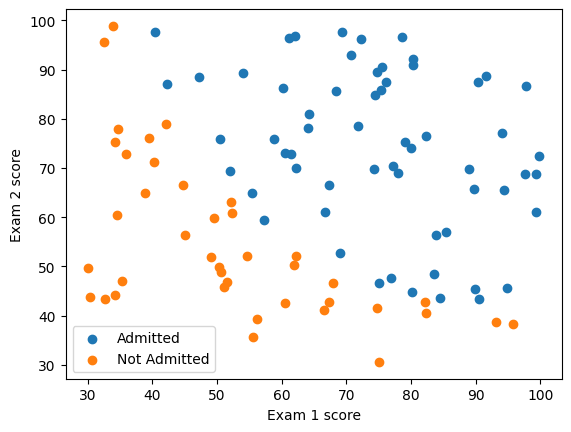

In [6]:
print("Array value of y:")
y[:5]
print("Exam 1-score graph:")
plt.figure()
plt.scatter(x[y == 1][:,0], x[y == 1][:, 1], label="Admitted")
plt.scatter(x[y == 0][:,0], x[y == 0][:, 1], label="Not Admitted")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()
plt.show()

In [7]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

Sigmoid function graph: 


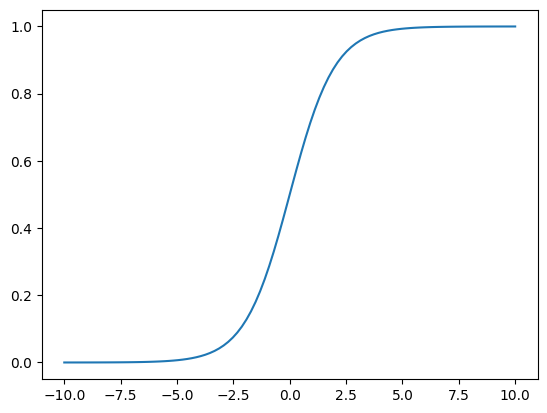

In [8]:
print("Sigmoid function graph: ")
plt.plot()
x_plot = np.linspace(-10, 10, 100)
plt.plot(x_plot, sigmoid(x_plot))
plt.show()

In [9]:
def costFunction(theta, x, y):
  h = sigmoid(np.dot(x, theta))
  J = -(np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) / x.shape[0]
  grad = np.dot(x.T, h - y) / x.shape[0]
  return J, grad

In [10]:
x_train = np.hstack((np.ones((x.shape[0], 1)), x))
theta = np.array([0, 0, 0])
J,grad = costFunction(theta, x_train, y)
print("x_train_grad value:")
print(J)
print(grad)

x_train_grad value:
0.6931471805599452
[ -0.1        -12.00921659 -11.26284221]


In [11]:
def cost(theta, x, y):
  h = sigmoid(np.dot(x, theta))
  J = - (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) / x.shape[0]
  return J

In [12]:
def gradient(theta, x, y):
  h = sigmoid(np.dot(x, theta))
  grad = np.dot(x.T, h - y) / x.shape[0]
  return grad

In [13]:
x_train = np.hstack((np.ones((x.shape[0], 1)), x))
theta = np.array([0, 0, 0])
res = optimize.minimize(fun=cost, x0=theta, args=(x_train, y),
method='Newton-CG', jac=gradient)
print("res.x:")
print(res.fun)
print(res.x)

res.x:
0.20349770158945205
[-25.16134246   0.20623179   0.20147167]


In [14]:
def plotDecisionBoundary(theta, x, y):
  x_min, x_max = x[:, 0].min() -1, x[:, 0].max() + 1
  y_min, y_max = x[:, 1].min() -1, x[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                       np.arange(y_min, y_max, 0.1))
  x_plot = np.c_[xx.ravel(), yy.ravel()]
  x_plot = np.hstack((np.ones((x_plot.shape[0], 1)), x_plot))
  y_plot = np.dot(x_plot, theta).reshape(xx.shape)
  plt.figure()
  plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], label="Admitted")
  plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], label="Not Admitted")
  plt.contour(xx, yy, y_plot, levels=[0])
  plt.xlabel("Exam 1 score")
  plt.ylabel("Exam 2 score")
  plt.legend()
  plt.show()

Descision Boundary - graph for exam score:


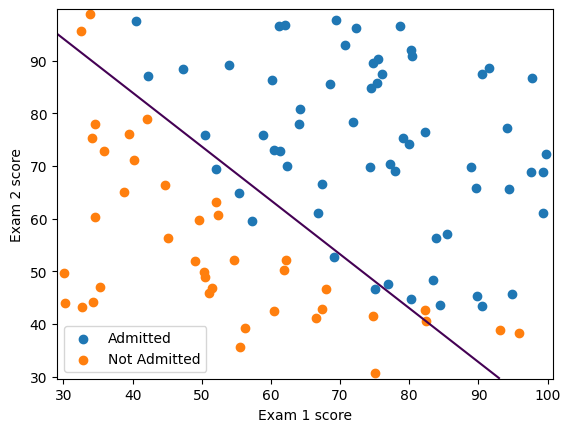

In [15]:
print("Descision Boundary - graph for exam score:")
plotDecisionBoundary(res.x, x,y)

In [16]:
print("probability value:")
prob = sigmoid(np.dot(np.array([1, 45, 85]), res.x))
print(prob)

probability value:
0.7762907420026233


In [17]:
def predict(theta, x):
  x_train = np.hstack((np.ones((x.shape[0], 1)), x))
  prob = sigmoid(np.dot(x_train, theta))
  return (prob >= 0.5).astype(int)

In [18]:
print("Prediction value of mean:")
np.mean(predict(res.x, x) == y)

Prediction value of mean:


0.89